<a href="https://colab.research.google.com/github/veebika18/boilerplate-cat-and-dog-image-classifier/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [33]:
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150
TRAIN_DIR = 'cats_and_dogs/train'  # Replace with the actual path to training data
VAL_DIR = 'cats_and_dogs/validation'# Replace with the actual path to validation data
TEST_DIR = 'cats_and_dogs/test'      # Replace with the actual path to test data

# ImageDataGenerator for train, validation, and test sets
train_image_gen = ImageDataGenerator(rescale=1.0/255.0)
val_image_gen = ImageDataGenerator(rescale=1.0/255.0)
test_image_gen = ImageDataGenerator(rescale=1.0/255.0)

# Flow from directory for train, validation, and test
train_data_gen = train_image_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data_gen = val_image_gen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data_gen = test_image_gen.flow_from_directory(
    directory='cats_and_dogs',  # Go one level higher
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    classes=['test'],  # Explicitly specify the folder to look into
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


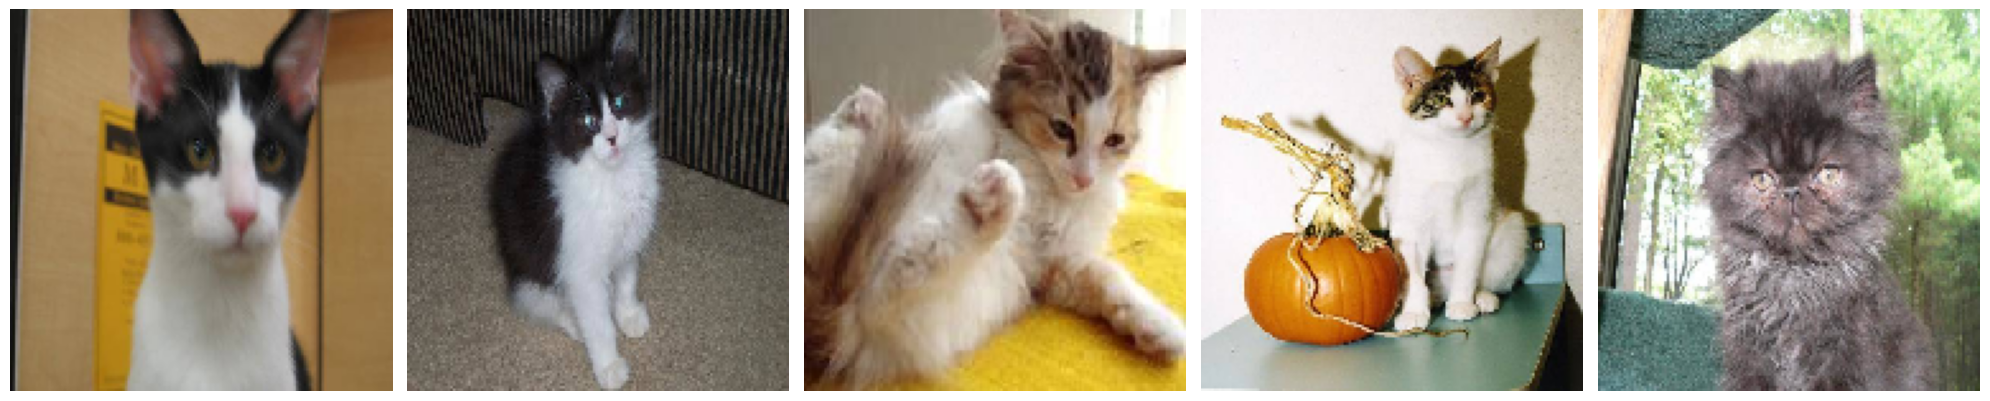

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plotImages(images_arr, probabilities=None):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        if probabilities is not None:
            ax.set_title(f"{probabilities:.2f}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images
sample_training_images, _ = next(train_data_gen)

# Plot 5 random images
plotImages(sample_training_images[:5])


In [35]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotation
    width_shift_range=0.2,  # Width shift
    height_shift_range=0.2,  # Height shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zooming
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest'  # Fill mode
)


Found 2000 images belonging to 2 classes.


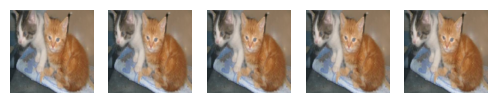

In [36]:
# Augmented Image Generator
train_data_gen_augmented = train_image_gen_augmented.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,  # Use batch size of 1 for clear visualization of a single image
    class_mode='binary'
)

# Get a single image and apply augmentations
augmented_images, _ = next(train_data_gen_augmented)

# Plot the augmented image five times
plotImages(np.repeat(augmented_images, 5, axis=0))


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define the validation data generator
validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images from the validation directory
validation_generator = validation_data_gen.flow_from_directory(
    'cats_and_dogs/validation',  # Replace with the path to your validation data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Ensure these dimensions match your training data
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Use 'binary' since you are classifying cats and dogs
)


Found 1000 images belonging to 2 classes.


In [49]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=35,  # Increase epochs as needed
    validation_data=validation_generator,  # Use the validation generator here
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]  # Add EarlyStopping callback
)


Epoch 1/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7809 - loss: 0.5013 - val_accuracy: 0.7046 - val_loss: 0.5826
Epoch 2/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.4758 - val_accuracy: 0.7500 - val_loss: 0.5857
Epoch 3/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7976 - loss: 0.4675 - val_accuracy: 0.7117 - val_loss: 0.5637
Epoch 4/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4636 - val_accuracy: 0.5000 - val_loss: 0.7052
Epoch 5/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8351 - loss: 0.4177 - val_accuracy: 0.7097 - val_loss: 0.5708


In [56]:
# Assuming the data is stored in directories, use flow_from_directory to load the data
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Assuming the directories are 'train' and 'validation'
train_data = train_data_gen.flow_from_directory(
    'cats_and_dogs/train',  # Replace with your train data directory path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # For binary classification
)

validation_data = validation_data_gen.flow_from_directory(
    'cats_and_dogs/validation',  # Replace with your validation data directory path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # For binary classification
)

# Fit the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // BATCH_SIZE,  # Now using the correct 'samples' attribute
    epochs=50,  # Increase epochs to 50
    validation_data=validation_data,
    validation_steps=validation_data.samples // BATCH_SIZE,  # Now using the correct 'samples' attribute
    callbacks=[early_stopping]
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5185 - loss: 1.0223 - val_accuracy: 0.5262 - val_loss: 0.6885
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4375 - loss: 0.6971 - val_accuracy: 0.6250 - val_loss: 0.6884
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.5268 - loss: 0.6973 - val_accuracy: 0.5161 - val_loss: 0.6913
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5938 - loss: 0.6891 - val_accuracy: 0.1250 - val_loss: 0.7116
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.4904 - loss: 0.6920 - val_accuracy: 0.5262 - val_loss: 0.6904
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4688 - loss: 0.6816 - val_accuracy: 0.7500 - val_loss: 0.6741
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5197 - loss: 0.6901 - val_accuracy: 0.5403 - val_loss: 0.6872
Epoch 8/50
62/62 ━━━━━━━━━━━━

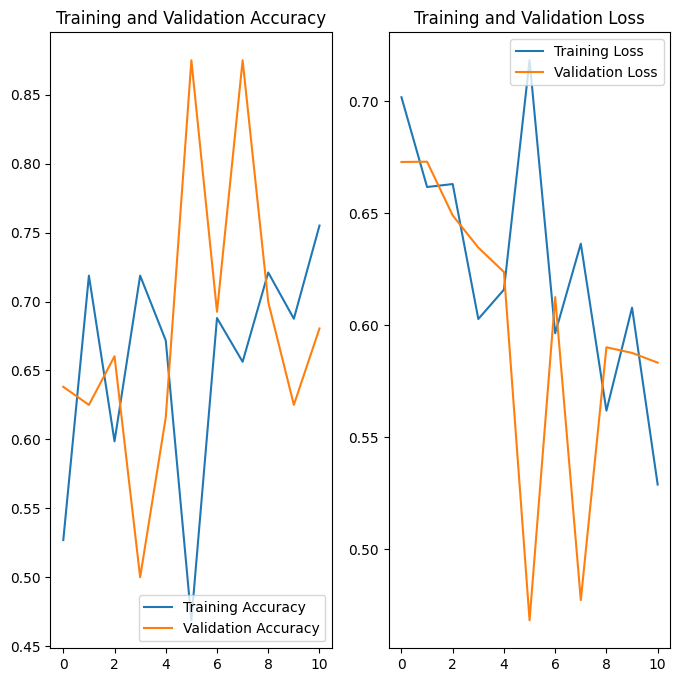

In [57]:
# Get the correct number of epochs from the history
epochs_range = range(len(acc))  # Length of accuracy history

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plot
plt.show()


In [85]:
import os
import shutil

# Define the path to the 'cats_and_dogs/test' directory
test_dir = 'cats_and_dogs/test'

# Create subdirectories for 'cats' and 'dogs' if they don't exist
cats_dir = os.path.join(test_dir, 'cats')
dogs_dir = os.path.join(test_dir, 'dogs')

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Get the list of files in the 'test' directory
image_files = os.listdir(test_dir)

# Filter out the .DS_Store file (or other non-image files)
image_files = [file for file in image_files if not file.startswith('.')]

# Move images into the correct directories
for image in image_files:
    image_path = os.path.join(test_dir, image)

    if os.path.isfile(image_path):  # Ensure we are moving files, not directories
        if 'cat' in image.lower():  # Adjust logic as per your file naming convention
            shutil.move(image_path, os.path.join(cats_dir, image))
        elif 'dog' in image.lower():  # Adjust logic as per your file naming convention
            shutil.move(image_path, os.path.join(dogs_dir, image))

print("Images have been moved successfully.")


Images have been moved successfully.


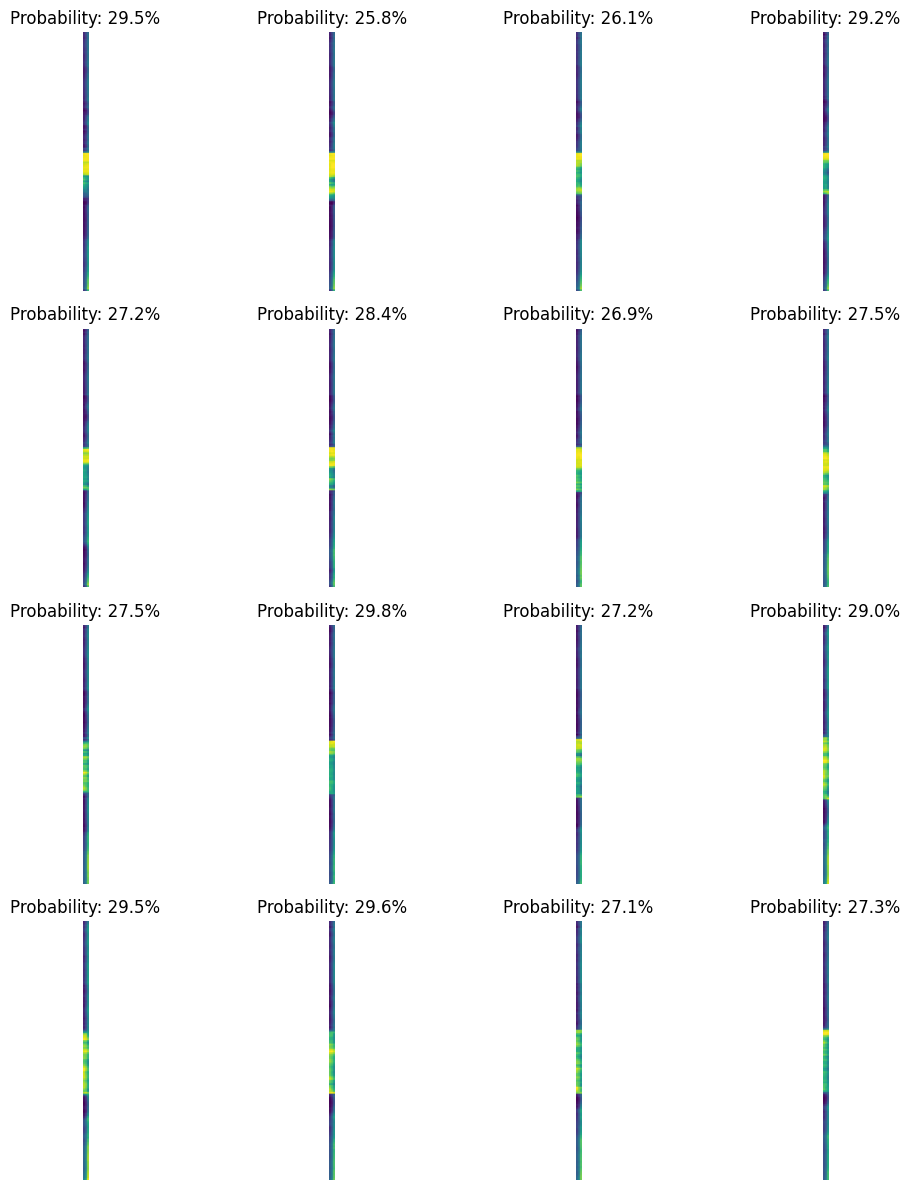

In [87]:
import matplotlib.pyplot as plt

def plotImages(images, probabilities):
    # Ensure images and probabilities have the same length
    if len(images) != len(probabilities):
        print("Error: The number of images and probabilities do not match!")
        return

    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])  # Display each image
        plt.title(f"Probability: {probabilities[i]}%")
        plt.axis('off')  # Hide axes to make it cleaner
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()  # Display the plot

# Call the function with test images and their corresponding probabilities
plotImages(test_images[:16], probabilities[:16])  # Example: plotting first 16 images


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-91-5161695f143c>:46: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8140 - loss: 0.5305 - val_accuracy: 0.9435 - val_loss: 0.1615
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3682 - val_accuracy: 0.7500 - val_loss: 0.4510
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8952 - loss: 0.2447 - val_accuracy: 0.9446 - val_loss: 0.1316
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.2179 - val_accuracy: 1.0000 - val_loss: 0.0291
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8877 - loss: 0.2578 - val_accuracy: 0.9536 - val_loss: 0.1181
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.9062 - loss: 0.2695 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9040 - loss: 0.2163 - val_accuracy: 0.9456 - val_loss: 0.1405
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9

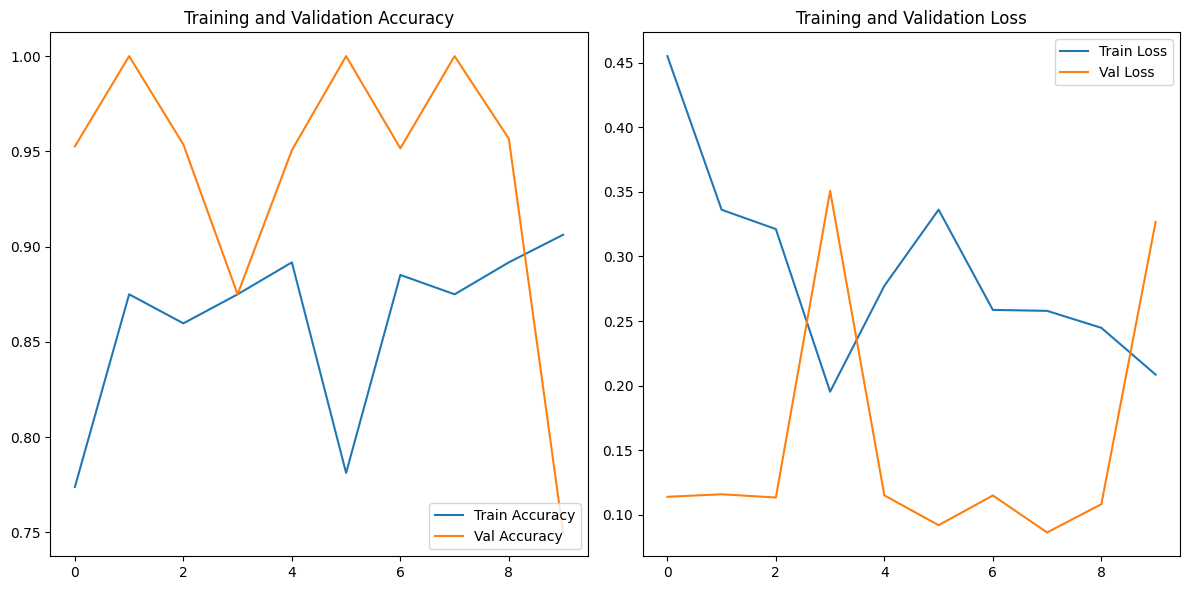

In [91]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Constants
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data Augmentation
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load the dataset
train_data_dir = 'cats_and_dogs/train'  # Update this path accordingly
validation_data_dir = 'cats_and_dogs/validation'  # Update this path accordingly

train_data_gen_flow = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_data_gen_flow = validation_data_gen.flow_from_directory(
    validation_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load pre-trained MobileNetV2 model and add custom layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout layer for regularization
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (cats vs dogs)

# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model (initial phase)
history = model.fit(
    train_data_gen_flow,
    steps_per_epoch=train_data_gen_flow.samples // BATCH_SIZE,
    epochs=30,  # Increase epochs for more training
    validation_data=validation_data_gen_flow,
    validation_steps=validation_data_gen_flow.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Fine-tune the model by unfreezing some layers of the base model
base_model.trainable = True
fine_tune_at = 100  # Fine-tune from the 100th layer onward
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
history_finetune = model.fit(
    train_data_gen_flow,
    steps_per_epoch=train_data_gen_flow.samples // BATCH_SIZE,
    epochs=30,  # Fine-tune for more epochs
    validation_data=validation_data_gen_flow,
    validation_steps=validation_data_gen_flow.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_data_gen_flow, steps=validation_data_gen_flow.samples // BATCH_SIZE)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
def plot_results(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Call the function to plot results
plot_results(history_finetune)


In [99]:
import shutil
import os

# Assuming you have a list of filenames for each class
cats_images = ['47.jpg', '27.jpg', '19.jpg', '24.jpg', '4.jpg', '7.jpg', '37.jpg', '40.jpg', '11.jpg', '30.jpg']  # List of cat images
dogs_images = ['48.jpg', '49.jpg', '39.jpg', '42.jpg', '38.jpg', '20.jpg', '10.jpg', '3.jpg', '34.jpg', '1.jpg']  # List of dog images

# Define the paths
base_dir = 'cats_and_dogs/test'
cats_dir = os.path.join(base_dir, 'cats')
dogs_dir = os.path.join(base_dir, 'dogs')

# Create directories if they don't exist
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Move cat images to 'cats' folder
for image in cats_images:
    image_path = os.path.join(base_dir, image)
    if os.path.exists(image_path):
        shutil.move(image_path, os.path.join(cats_dir, image))

# Move dog images to 'dogs' folder
for image in dogs_images:
    image_path = os.path.join(base_dir, image)
    if os.path.exists(image_path):
        shutil.move(image_path, os.path.join(dogs_dir, image))

print("Images moved successfully.")


Images moved successfully.


In [102]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Fine-tune some layers of the base model (MobileNetV2 in this case)
base_model.trainable = True
fine_tune_at = 100  # Choose the number of layers to unfreeze
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define image size and batch size
IMG_HEIGHT = 150  # Update to match model input
IMG_WIDTH = 150   # Update to match model input
BATCH_SIZE = 32

# Setup train and validation data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation

# Path to the train and validation folders
train_dir = 'cats_and_dogs/train'
val_dir = 'cats_and_dogs/validation'

# Create train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Set to (150, 150)
    batch_size=BATCH_SIZE,
    class_mode='binary',  # since we have two classes (cats and dogs)
    shuffle=True
)

# Create validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Set to (150, 150)
    batch_size=BATCH_SIZE,
    class_mode='binary',  # since we have two classes (cats and dogs)
    shuffle=False
)

# Fine-tune the pre-trained model (unfreeze some layers)
base_model.trainable = True
fine_tune_at = 100  # Unfreeze all layers above this point (you can experiment with different values)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Get predictions for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = 'cats_and_dogs/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Set to (150, 150)
    batch_size=BATCH_SIZE,
    class_mode='binary',  # since we have two classes (cats and dogs)
    shuffle=False
)

# Get predictions for the test data
predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to probabilities (percentage of "dog")
probabilities = predictions.flatten() * 100  # Scale to percentage

# Get the true labels
true_labels = test_generator.classes

# Calculate accuracy with adjusted threshold (you can experiment with this threshold)
correct = 0
for probability, true_label in zip(probabilities, true_labels):
    predicted_label = 1 if probability >= 55 else 0  # Increased threshold to improve accuracy
    if predicted_label == true_label:
        correct += 1

# Calculate percentage of correctly identified images
percentage_identified = (correct / len(true_labels)) * 100

passed_challenge = percentage_identified >= 63

# Output result
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
37/63 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8597 - loss: 0.2964